In [1]:
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('parliament_members_training_set.csv')
test = pd.read_csv('parliament_members_validation_set.csv')

In [3]:
data = train.append(test)
data = data.sort_values('parliament_member')
data = data.reset_index().drop('index', axis=1)

del train
del test

# Statistics
---

## All Nodes

In [4]:
data.describe().drop('parliament_member', axis=1).drop('count').round(2)

,statuses_count,friends_count,followers_count,favourites_count
mean,4510.82,868.08,12934.54,3338.60
std,15419.86,1676.62,69692.94,12227.04
min,0.00,0.00,0.00,0.00
25%,44.00,72.25,121.50,6.00
50%,784.00,345.50,584.50,146.50
75%,3585.25,978.25,3248.50,1889.25
max,216925.00,15566.00,1023630.00,205214.00


In [5]:
data['description'].replace(np.nan, '', inplace=True)
count = len(data)
no_desc_count = len(data[data['description'] == ''])
print(f'{(no_desc_count/count)*100}% (Total: {no_desc_count}) of the nodes do not have a profile descirption')

13.25% (Total: 53) of the nodes do not have a profile descirption


## Parliament Members

In [6]:
data[data['parliament_member'] == 1].describe().drop('parliament_member', axis=1).drop('count').round(2)

,statuses_count,friends_count,followers_count,favourites_count
mean,4159.13,1112.84,19955.73,2201.14
std,11606.76,1685.73,87794.02,4752.61
min,0.00,0.00,7.00,0.00
25%,388.75,184.50,546.75,18.50
50%,1219.00,569.00,2366.50,247.50
75%,4175.00,1338.00,8859.00,1637.00
max,142914.00,11877.00,1023630.00,34685.00


In [10]:
data['description'].replace(np.nan, '', inplace=True)
count = len(data[data['parliament_member'] == 1])
no_desc_count = len(data[(data['parliament_member'] == 1) & (data['description'] == '')])
no_status_count = len(data[(data['parliament_member'] == 1) & (data['statuses_count'] == 0)])
no_friends_count = len(data[(data['parliament_member'] == 1) & (data['friends_count'] == 0)])
no_followers_count = len(data[(data['parliament_member'] == 1) & (data['followers_count'] == 0)])

no_desc_status = len(data[(data['parliament_member'] == 1)
                          &(data['description'] == '')
                          &(data['statuses_count'] == 0)])
no_desc_status_friends = len(data[(data['parliament_member'] == 1) 
                                  &(data['description'] == '')
                                  &(data['statuses_count'] == 0)
                                  &(data['friends_count'] == 0)])

no_desc_status_followers = len(data[(data['parliament_member'] == 1) 
                                  &(data['description'] == '')
                                  &(data['statuses_count'] == 0)
                                  &(data['friends_count'] == 0)
                                  &(data['followers_count'] == 0)])



print(f'No Descriptions: {(no_desc_count/count)*100}% (Total: {no_desc_count})')
print(f'No Tweets: {(no_status_count/count)*100}% (Total: {no_status_count})')
print(f'No Friends:{(no_friends_count/count)*100}% (Total: {no_friends_count})')
print(f'No Followers:{(no_followers_count/count)*100}% (Total: {no_followers_count})')

print(f'No Description and Tweets: {(no_desc_status/count)*100}% (Total: {no_desc_status})')
print(f'No Description,Tweets,Friends: {(no_desc_status_friends/count)*100}% (Total: {no_desc_status_friends})')
print(f'No Description,Tweets,Friends, Followers, Friends: {(no_desc_status_followers/count)*100}% (Total: {no_desc_status_followers})')

No Descriptions: 10.0% (Total: 20)
No Tweets: 1.5% (Total: 3)
No Friends:2.0% (Total: 4)
No Followers:0.0% (Total: 0)
No Description and Tweets: 1.5% (Total: 3)
No Description,Tweets,Friends: 0.5% (Total: 1)
No Description,Tweets,Friends, Followers, Friends: 0.0% (Total: 0)


## Not Parliament Members

In [8]:
data[data['parliament_member'] == 0].describe().drop(['parliament_member'], axis=1).drop('count').round(2)

,statuses_count,friends_count,followers_count,favourites_count
mean,4862.52,623.31,5913.35,4476.06
std,18487.12,1635.27,43951.56,16569.99
min,0.00,0.00,0.00,0.00
25%,5.00,22.75,7.00,2.00
50%,233.00,162.00,176.00,70.50
75%,2632.75,689.00,609.75,2005.25
max,216925.00,15566.00,592141.00,205214.00


In [12]:
data['description'].replace(np.nan, '', inplace=True)
count = len(data[data['parliament_member'] == 0])
no_desc_count = len(data[(data['parliament_member'] == 0) & (data['description'] == '')])
no_status_count = len(data[(data['parliament_member'] == 0) & (data['statuses_count'] == 0)])
no_friends_count = len(data[(data['parliament_member'] == 0) & (data['friends_count'] == 0)])
no_followers_count = len(data[(data['parliament_member'] == 0) & (data['followers_count'] == 0)])

no_desc_status = len(data[(data['parliament_member'] == 0)
                          &(data['description'] == '')
                          &(data['statuses_count'] == 0)])
no_desc_status_friends = len(data[(data['parliament_member'] == 0) 
                                  &(data['description'] == '')
                                  &(data['statuses_count'] == 0)
                                  &(data['friends_count'] == 0)])
no_desc_status_followers = len(data[(data['parliament_member'] == 0) 
                                  &(data['description'] == '')
                                  &(data['statuses_count'] == 0)
                                  &(data['friends_count'] == 0)
                                  &(data['followers_count'] == 0)])



print(f'No Descriptions: {(no_desc_count/count)*100}% (Total: {no_desc_count})')
print(f'No Tweets: {(no_status_count/count)*100}% (Total: {no_status_count})')
print(f'No Friends:{(no_friends_count/count)*100}% (Total: {no_friends_count})')
print(f'No Followers:{(no_followers_count/count)*100}% (Total: {no_followers_count})')
print(f'No Description and Tweets: {(no_desc_status/count)*100}% (Total: {no_desc_status})')
print(f'No Description,Tweets,Friends: {(no_desc_status_friends/count)*100}% (Total: {no_desc_status_friends})')
print(f'No Description,Tweets,Friends, Followers, Friends: {(no_desc_status_followers/count)*100}% (Total: {no_desc_status_followers})')

No Descriptions: 16.5% (Total: 33)
No Tweets: 11.0% (Total: 22)
No Friends:4.5% (Total: 9)
No Followers:7.000000000000001% (Total: 14)
No Description and Tweets: 4.5% (Total: 9)
No Description,Tweets,Friends: 1.5% (Total: 3)
No Description,Tweets,Friends, Followers, Friends: 0.5% (Total: 1)


## Nodes without Description and Tweets

In [140]:
data[(data['description'] == '')&(data['statuses_count'] == 0)].sort_values('friends_count')

,screen_name,name,description,statuses_count,recent_100_tweets,friends_count,recent_100_friends_nd,followers_count,default_profile_image,favourites_count,parliament_member
141,ypizgbKtHYwKTzy,Δημητρης πουλας,,0,NaN,0,NaN,1,True,0,0
168,ab1b8553db9b430,Γιώργος Χειμαρας,,0,NaN,0,NaN,0,False,0,0
193,Oly9TBdOlFahcnM,Διγαλακης Μιχάλης,,0,NaN,0,NaN,2,True,0,0
388,Sofia_voultepsi,Σοφία Βούλτεψη,,0,NaN,0,NaN,967,False,0,1
127,K9IsGBpmTctz4cj,Κωνσταντινος Μπογδανος,,0,NaN,2,Λαζαρίδης Λάζαρος Σύμβουλος διαφήμισης & επικ...,5,False,0,0
260,RoussopoulosTh,Θοδωρής Ρουσόπουλος,,0,NaN,2,ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ Ο επίσημος λογαριασμός της Νέα...,342,False,5,1
364,Vrizidou_Vicky,Παρασκευή Βρυζίδου,,0,NaN,3,Pisti Krystallidou Έχω προνοήσει να είμαι επα...,45,False,0,1
185,moulk_nick,Νικόλαος Μουλκιώτης,,0,NaN,4,Athens Voice Η μεγαλύτερη εβδομαδιαία εφημερί...,1,False,0,0
176,voloudakisgiann,Γιαννη Βολουδακης,,0,NaN,5,ELLINOFRENEIA Μία καθημερινή σάτιρα με πρωταγ...,0,True,0,0
56,chrisstaikouras,Χρήστος Σταϊκούρας,,0,NaN,11,Tripadvisor Find the good out there. #TheresG...,58,True,0,0


# Word Frequencies
---

In [13]:
def clean_text(data):
    urls = r'http\S+'
    non_unicode_char = r'\W'
    numbers = r'[0-9_]'
    fix_whitespace = r'\s+'
    single_whitespace = ' '
    
    data = (data.replace([urls], single_whitespace, regex=True)
                    .replace([non_unicode_char, numbers], single_whitespace, regex=True)
                    .replace(fix_whitespace, single_whitespace, regex=True))
    data = data.apply(lambda s: s.lower() if type(s) == str else s)
    return data

nlp_el = spacy.load('el_core_news_md')
nlp_en = spacy.load('en_core_web_sm')
STOPWORDS = set(list(spacy.lang.en.STOP_WORDS) + list(spacy.lang.el.STOP_WORDS))

def remove_stopwords(row):
    row = [str(token) for token in nlp_el(row)]
    return [w for w in row if w not in STOPWORDS]

def tokenize_lemmatize(row):
    return [str(token.lemma_) for token in nlp_el(row)]

def remove_shortwords(row):
    row = [str(token) for token in nlp_el(row)]
    return [w for w in row if len(w) > 1]

In [14]:
data.replace(np.nan, '', inplace=True)
text_df = pd.DataFrame()
text_df['nd'] = clean_text(data['name'] +' '+data['description'])
text_df['t'] = clean_text(data['recent_100_tweets'])
text_df['f'] = clean_text(data['recent_100_friends_nd'])

In [15]:
text_df['nd'] = text_df['nd'].apply(lambda row: tokenize_lemmatize(row))
text_df['nd'] = text_df['nd'].apply(lambda row: ' '.join(row))
text_df['nd'] = text_df['nd'].apply(lambda row: remove_stopwords(row))
text_df['nd'] = text_df['nd'].apply(lambda row: ' '.join(row))
text_df['nd'] = text_df['nd'].apply(lambda row: remove_shortwords(row))
text_df['nd'] = text_df['nd'].apply(lambda row: ' '.join(row))

text_df['t'] = text_df['t'].apply(lambda row: tokenize_lemmatize(row))
text_df['t'] = text_df['t'].apply(lambda row: ' '.join(row))
text_df['t'] = text_df['t'].apply(lambda row: remove_stopwords(row))
text_df['t'] = text_df['t'].apply(lambda row: ' '.join(row))
text_df['t'] = text_df['t'].apply(lambda row: remove_shortwords(row))
text_df['t'] = text_df['t'].apply(lambda row: ' '.join(row))

text_df['f'] = text_df['f'].apply(lambda row: tokenize_lemmatize(row))
text_df['f'] = text_df['f'].apply(lambda row: ' '.join(row))
text_df['f'] = text_df['f'].apply(lambda row: remove_stopwords(row))
text_df['f'] = text_df['f'].apply(lambda row: ' '.join(row))
text_df['f'] = text_df['f'].apply(lambda row: remove_shortwords(row))
text_df['f'] = text_df['f'].apply(lambda row: ' '.join(row))

In [16]:
text_df['parliament_member'] = data['parliament_member']

Text(0.5, 1.0, 'Μη-Βουλευτές')

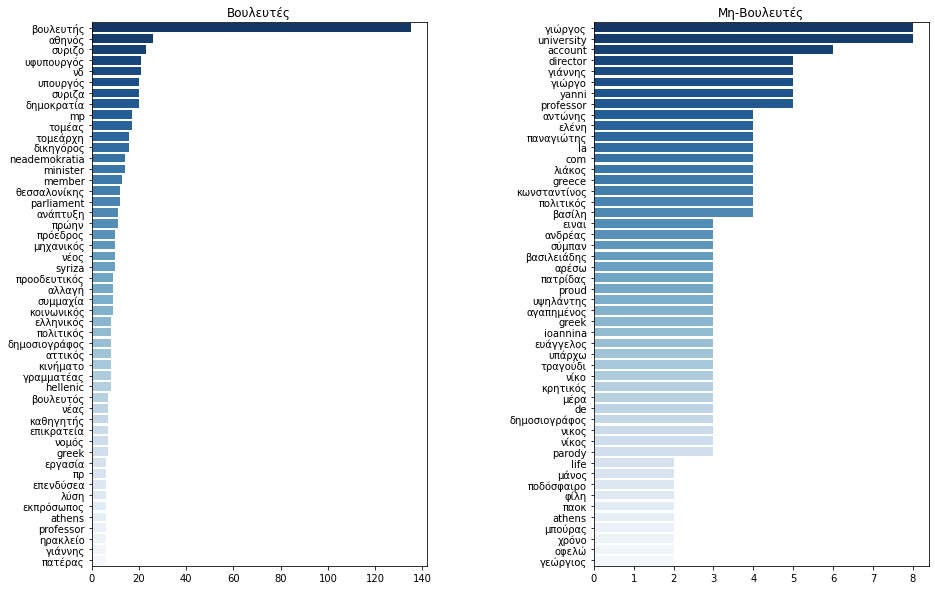

In [20]:
pol_words = pd.Series(' '.join(text_df[text_df.parliament_member == 1].nd).split()).value_counts()
nonpol_words = pd.Series(' '.join(text_df[text_df.parliament_member == 0].nd).split()).value_counts()

fig, axs = plt.subplots(1,2,figsize =(15,10))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5)

sns.barplot(y=pol_words[:50].index, x=pol_words[:50], orient='h', ax = axs[0], palette="Blues_r")
axs[0].set_title('Βουλευτές')

sns.barplot(y=nonpol_words[:50].index, x=nonpol_words[:50], orient='h', ax = axs[1], palette="Blues_r")
axs[1].set_title('Μη-Βουλευτές')

Text(0.5, 1.0, 'Μη-Βουλευτές')

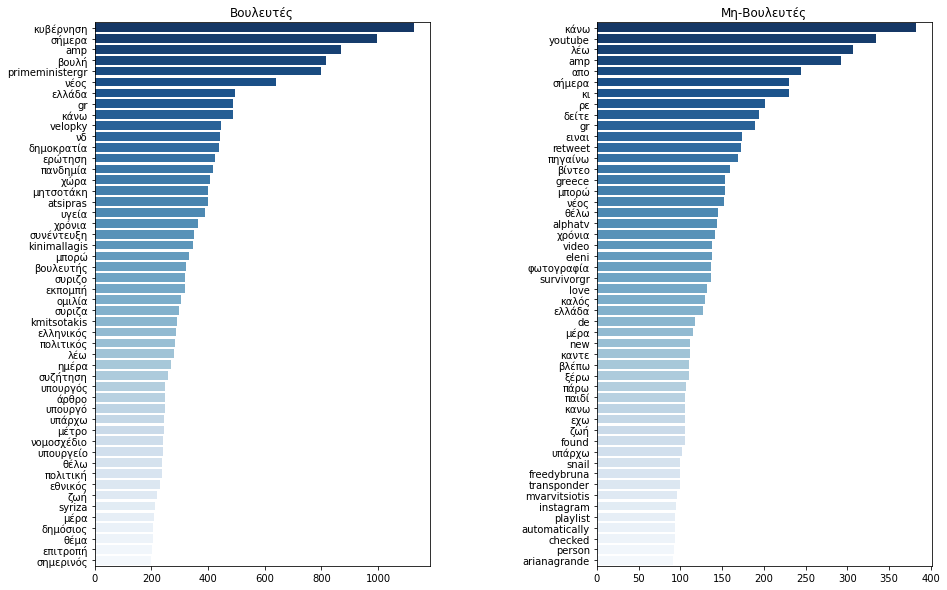

In [21]:
text_df['t'] = text_df['t'].replace('rt\s', ' ', regex=True)
pol_words = pd.Series(' '.join(text_df[text_df.parliament_member == 1].t).split()).value_counts()
nonpol_words = pd.Series(' '.join(text_df[text_df.parliament_member == 0].t).split()).value_counts()

fig, axs = plt.subplots(1,2,figsize =(15,10))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5)

sns.barplot(y=pol_words[:50].index, x=pol_words[:50], orient='h', ax = axs[0], palette="Blues_r")
axs[0].set_title('Βουλευτές')

sns.barplot(y=nonpol_words[:50].index, x=nonpol_words[:50], orient='h', ax = axs[1], palette="Blues_r")
axs[1].set_title('Μη-Βουλευτές')

Text(0.5, 1.0, 'Μη-Βουλευτές')

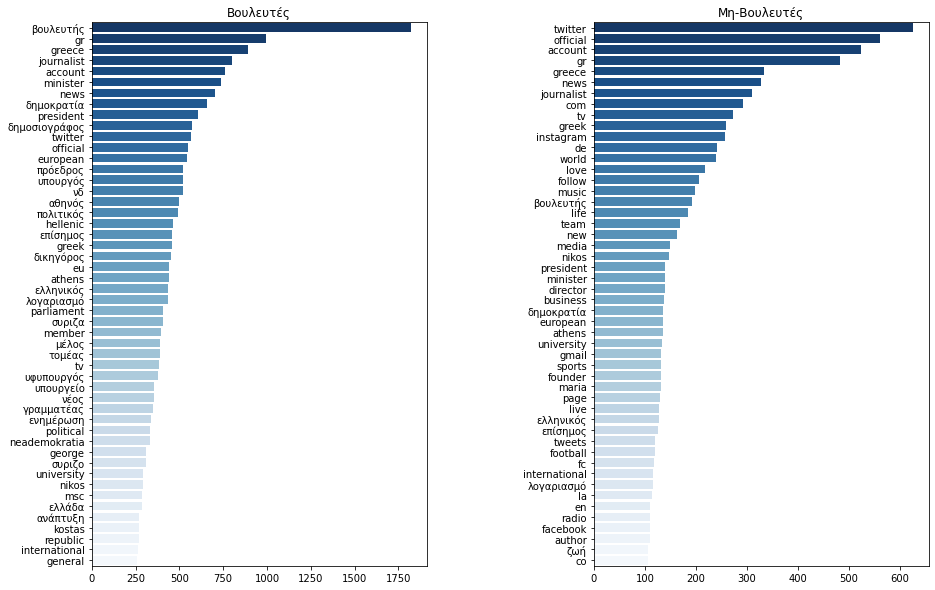

In [22]:
pol_words = pd.Series(' '.join(text_df[text_df.parliament_member == 1].f).split()).value_counts()
nonpol_words = pd.Series(' '.join(text_df[text_df.parliament_member == 0].f).split()).value_counts()

fig, axs = plt.subplots(1,2,figsize =(15,10))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5)

sns.barplot(y=pol_words[:50].index, x=pol_words[:50], orient='h', ax = axs[0], palette="Blues_r")
axs[0].set_title('Βουλευτές')

sns.barplot(y=nonpol_words[:50].index, x=nonpol_words[:50], orient='h', ax = axs[1], palette="Blues_r")
axs[1].set_title('Μη-Βουλευτές')